In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

In [2]:
import TELF
TELF.__version__

'0.0.40'

# Load Data

In [3]:
import numpy as np
X = np.load(os.path.join("..", "..", "data", "dog.npz"))["X"]
X.shape

(400, 15)

# Create Training Set and MASK

In [4]:
import sys; sys.path.append(os.path.join("..", "..", "scripts"))
from sample_with_mask import sample_matrix

X, Xtrain, MASK, removed_coords= sample_matrix(X, sample_ratio=0.2, random_state=42, stratify=True)

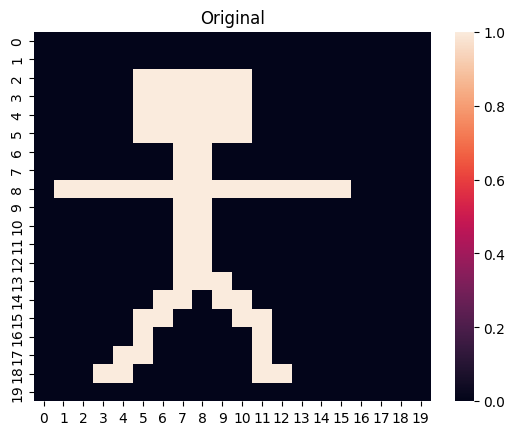

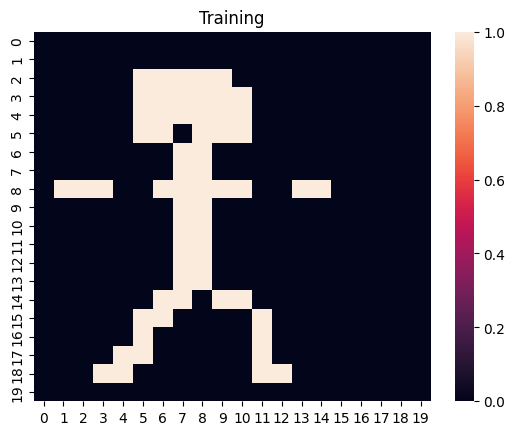

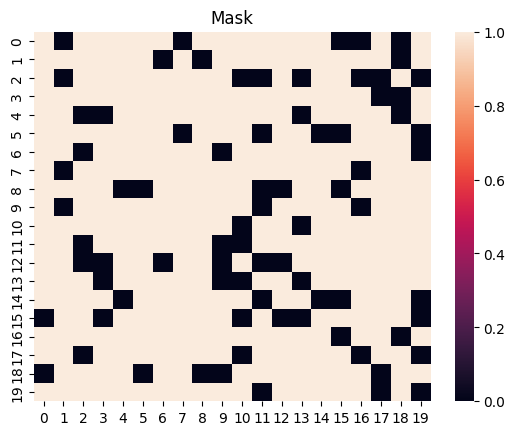

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

target_figure = 1
sns.heatmap(np.reshape(X[:,target_figure], (20,20)))
plt.title("Original")
plt.show()

sns.heatmap(np.reshape(Xtrain[:,target_figure], (20,20)))
plt.title("Training")
plt.show()

sns.heatmap(np.reshape(MASK[:,target_figure], (20,20)))
plt.title("Mask")
plt.show()

# Factorize

In [6]:
from TELF.factorization import NMFk

params = {
    "n_perturbs":12,
    "n_iters":250,
    "epsilon":0.015, # or (0.015, 0.015) which it does automatically
    "n_jobs":-1,
    "init":"nnsvd",
    
    "use_gpu":True,
    "verbose":True,
    "nmf_verbose":False,
    "perturb_verbose":False,
    "perturb_multiprocessing":False,
    "simple_plot":True,

    "save_path":os.path.join("..", "..", "results"), 
    "save_output":True,
    "collect_output":True,

    "transpose":False,
    "calculate_error":True,
    "predict_k":True,
    "predict_k_method":"sill",
    "sill_thresh":0.75,
    "H_sill_thresh":0.1,
    "k_search_method":"bst_pre",

    "use_consensus_stopping":0,
    "calculate_pac":True,
    "consensus_mat":True,

    "nmf_method":"bnmf",
    "perturb_type":"boolean",

    "nmf_obj_params":{
        "MASK":MASK,
        "lower_thresh":1,
        "upper_thresh":None,
        "tol":None,
        "constraint_tol":None,
        "alpha_W":0.0,
        "alpha_H":0.0,
    },

    "factor_thresholding":"otsu_thresh", # "coord_desc_thresh" or "WH_thresh" or "otsu_thresh"
    "factor_thresholding_H_regression":"kmeans_thresh",
    "factor_thresholding_obj_params":{
        #"max_iter":100,
        #"wt":None,
        #"ht":None,
    },

    "clustering_method":"bool", # "kmeans" or "bool" or "boolean"
    "clustering_obj_params":{
        #"distance":"hamming",
        "max_iters":100
    },

    "device":-1
}
Ks = range(1,9,1)
name = "Example_BNMFK"
note = "This is an example run of BNMFk"

model = NMFk(**params)

n_perturbs: 12
perturb_type: boolean
n_iters: 250
epsilon: (0.015, 0.015)
init: nnsvd
save_path: ../../results
save_output: True
use_gpu: False
verbose: True
nmf_verbose: False
perturb_verbose: False
transpose: False
collect_output: True
sill_thresh: 0.75
predict_k: True
predict_k_method: WH_sill
n_jobs: 12
n_nodes: 1
nmf: <function nmf at 0x12f885940>
nmf_method: bnmf
nmf_obj_params: {'MASK': array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]]), 'lower_thresh': 1, 'upper_thresh': None, 'tol': None, 'constraint_tol': None, 'alpha_W': 0.0, 'alpha_H': 0.0}
clustering_obj_params: {'max_iters': 100, 'distance': 'hamming'}
pruned: True
calculate_error: True
consensus_mat: True
use_consensus_stopping: 0
mask: None
calculate_pac: True
simple_plot: True
get_plot_data: False
perturb_multiprocessing: False
k_se

/Users/maksim/Desktop/Code/telf_internal/TELF/factorization/NMFk.py:838: UserWarning: predict_k_method is defaulted to WH_sill!
  warnings.warn("predict_k_method is defaulted to WH_sill!")
/Users/maksim/Desktop/Code/telf_internal/TELF/factorization/NMFk.py:845: UserWarning: calculate_pac is True. PAC calculation for large matrices can take long time. For large matrices, instead use consensus_mat=True and calculate_pac=False.
  warnings.warn("calculate_pac is True. PAC calculation for large matrices can take long time. For large matrices, instead use consensus_mat=True and calculate_pac=False.")
/Users/maksim/Desktop/Code/telf_internal/TELF/factorization/NMFk.py:856: UserWarning: calculate_error is True! Error calculation can make the runtime longer and take up more memory space!
  warnings.warn(
/Users/maksim/Desktop/Code/telf_internal/TELF/factorization/NMFk.py:876: UserWarning: epsilon was single element while using boolean perturbation. epsilon is now set to (0.015, 0.015).
  warnin

In [7]:
results = model.fit(Xtrain, Ks, name, note)

Performing K search with bst_pre. Ks=[5, 3, 2, 1, 4, 7, 6, 8]


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/maksim/Desktop/Code/telf_internal/TELF/factorization/NMFk.py:520: RuntimeWarning: [tELF]: Encountered unknown logging metric "pac"
  warnings.warn(f'[tELF]: Encountered unknown logging metric "{key}"', RuntimeWarning)
 12%|█▎        | 1/8 [00:02<00:14,  2.13s/it]/Users/maksim/miniconda3/envs/TELF/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  retur

# Look at Factorization Results

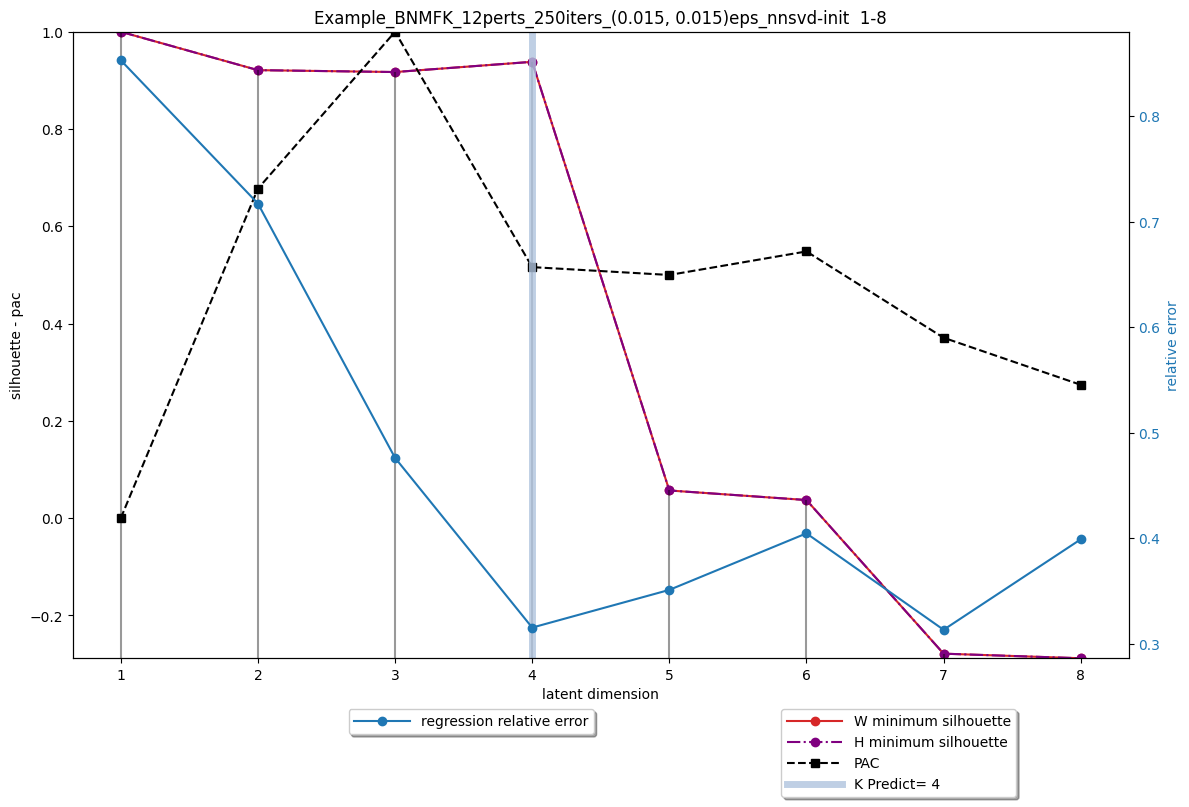

In [8]:
from IPython.display import Image

Image(filename=os.path.join(f'{model.save_path_full}', "FINAL_k=1-8.png")) 

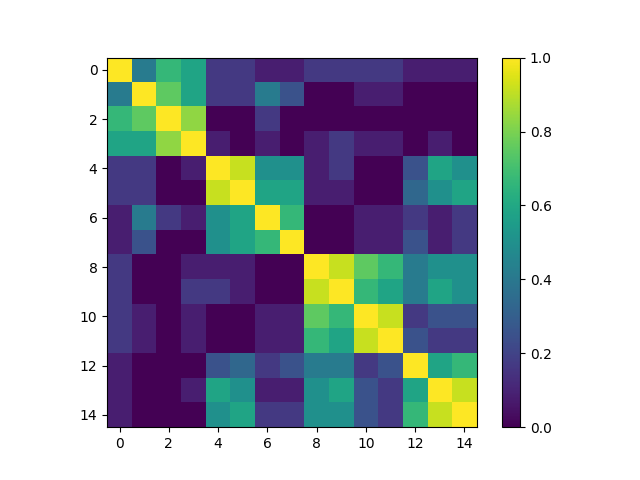

In [9]:
Image(filename=os.path.join(f'{model.save_path_full}', 'k_4_con_mat.png')) 

# Look at Prediction Results

In [10]:
results["W"], results["H"]

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.]],
       dtype=float32))

In [11]:
results["W"].min(), results["W"].max(), results["H"].min(), results["H"].max()

(np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0))

In [12]:
Xtilda = results["W"] @ results["H"]
Xtilda[Xtilda > 1] = 1

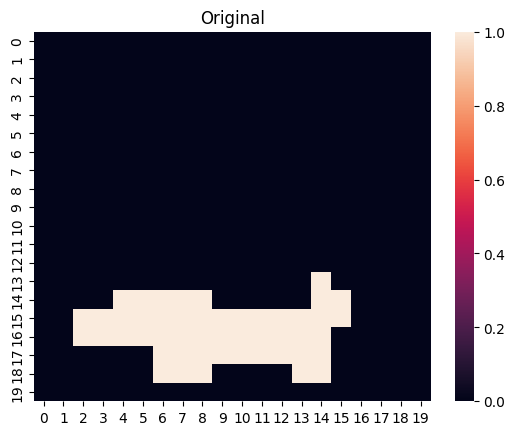

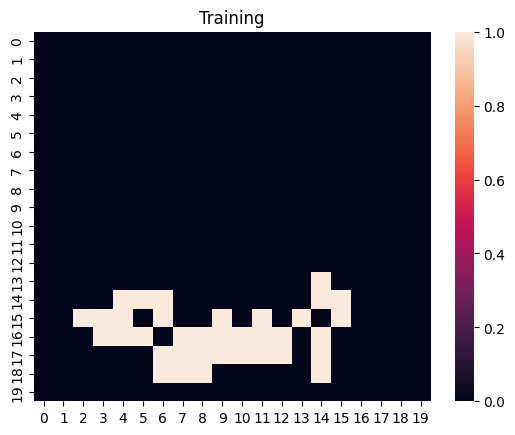

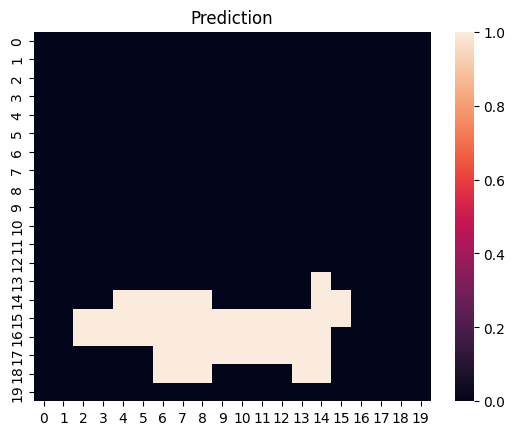

In [13]:
target_figure = 3
sns.heatmap(np.reshape(X[:,target_figure], (20,20)))
plt.title("Original")
plt.show()

sns.heatmap(np.reshape(Xtrain[:,target_figure], (20,20)))
plt.title("Training")
plt.show()

sns.heatmap(np.reshape(Xtilda[:,target_figure], (20,20)))
plt.title("Prediction")
plt.show()

In [14]:
from sklearn.metrics import root_mean_squared_error

def get_rmse_score(Xtrue, Xtilda, coords):
    
    y1 = Xtrue[coords]
    y2 = Xtilda[coords]

    rmse = root_mean_squared_error(y1, y2)
    return rmse

In [15]:
get_rmse_score(X, Xtilda, MASK==0)

np.float32(0.0)